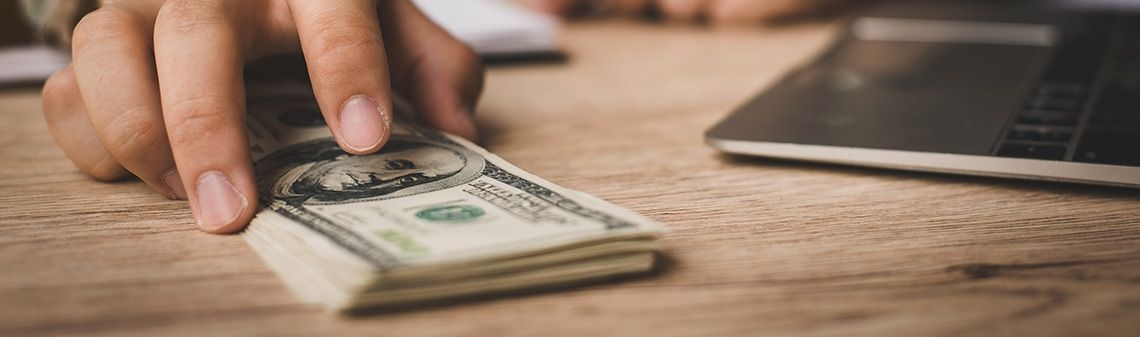

# **<font color = teal>Loan</font>** prediction 

***

A dataset taken from Kaggle for hands-on experience of analysis and predictive modelling. 

In [1]:
#basic python libraries for data processing and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inspect
import warnings
warnings.filterwarnings("ignore")


#basic machine learning libraries for data modelling, scoring, etc.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline
sns.set(style = "whitegrid", palette = "inferno") #setting the default style for seaborn graphs all through the notebook

#to change the default aspect of the upper limit of no. of rows and cols viewed by .head() at a time.
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [69]:
#importing the dataset
#train and test dataset provided
train = pd.read_csv("train.csv") #contains the target variable, on which we have to build the model

In [61]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
test = pd.read_csv("test.csv") #contains all the columns as in train except target variable, final prediction to be done on this set.
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [70]:
#converting the column names to lower case letters, to avoid confusion
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [12]:
train.describe(include = "all")

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001640,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### **Initial gist of the dataset -**
- train data has 614 rows and 13 cols
- test data has 367 rows and 12 cols
- ID column to be deleted because - all unique values, not useful in analysis
- presence of missing values and possible outliers
- 5 numerical columns

## Analysing dependent variable (loan_status)

In [14]:
train["loan_status"].value_counts()/len(train)*100 #checking the class count of the variable

Y    68.729642
N    31.270358
Name: loan_status, dtype: float64

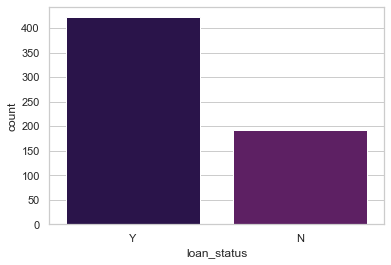

In [318]:
sns.countplot(train["loan_status"])
plt.show()

In [15]:
train["loan_status"].isnull().sum() #no null values

0

In [71]:
#converting the categorical values in numbers
train["loan_status"] = train["loan_status"].apply(lambda x: 1 if x == "Y" else 0)

In [72]:
y = train.loan_status.values  #storing target var. values in y variable

#### **About our target variable -**
- Slightly imbalanced data; Y = 68.72% | N = 31.27%
- Y/N classes converted to 1/0, respectively
- No missing values
- Need to balance the class distribution

## Exploratory Data Analysis

In [66]:
#Splitting target variable
train = train.iloc[:, :-1]

In [67]:
#storing train-test total no. of rows for later use
rtrain = train.shape[0]
rtest = test.shape[0]
print(rtrain)
print(rtest)

614
367


In [68]:
#Combining train and test for EDA
combo_trte = pd.concat([train, test], sort = False)
combo_trte.reset_index(inplace = True, drop = True)
combo_trte = combo_trte.drop(columns = "loan_id")  #Dropping loan_id col
combo_trte

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [73]:
#Numerical columns 
numerical_dtypes = ["int16", "int32", "int64", "float16", "float32", "float64"]
numerical_cols = combo_trte.select_dtypes(include = numerical_dtypes)
numerical_cols

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
976,4009,1777.0,113.0,360.0,1.0
977,4158,709.0,115.0,360.0,1.0
978,3250,1993.0,126.0,360.0,NaN
979,5000,2393.0,158.0,360.0,1.0


In [74]:
#categorical columns
categorical_dtype = ["object"]
categorical_cols = combo_trte.select_dtypes(include = categorical_dtype)
categorical_cols

,gender,married,dependents,education,self_employed,property_area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,Urban
977,Male,Yes,0,Graduate,No,Urban
978,Male,No,0,Graduate,No,Semiurban
979,Male,Yes,0,Graduate,No,Rural


### Processing <font color = maroon>numerical</font> variables

In [75]:
numerical_cols.isnull().sum()

applicantincome       0
coapplicantincome     0
loanamount           27
loan_amount_term     20
credit_history       79
dtype: int64

- **loanamount, loan_amount_term and credit_history** columns having missing values

#### Analysing individual numerical columns having missing values

1. loanamount

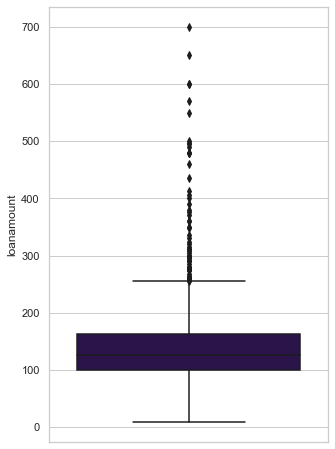

In [76]:
plt.figure(figsize = (5,8))
sns.boxplot(combo_trte["loanamount"], orient = "vertical")
plt.show()

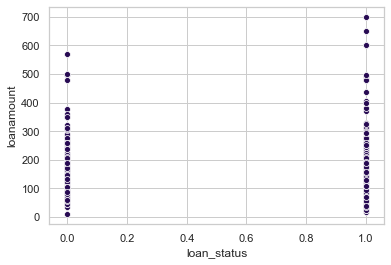

In [77]:
sns.scatterplot(x = "loan_status", y = "loanamount", data = train)
plt.show()

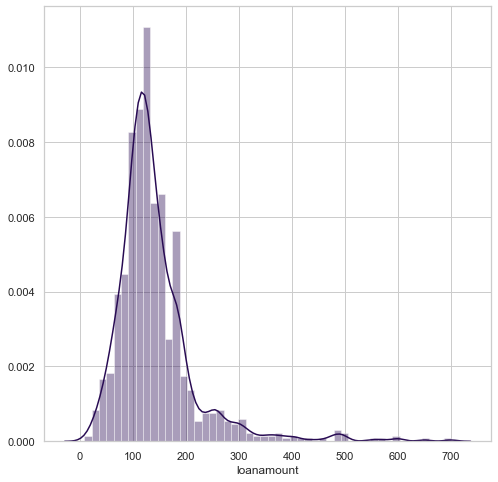

In [78]:
plt.figure(figsize = (8, 8))
sns.distplot(combo_trte["loanamount"])
plt.show()

In [79]:
#due to right skewness, filling the missing values with median.
#not deleting the values because of small dataset
combo_trte["loanamount"].fillna(combo_trte["loanamount"].median(), inplace = True)

2. loan_amount_term

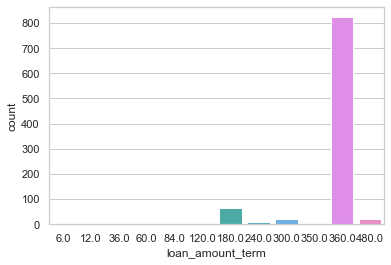

In [80]:
sns.countplot(combo_trte["loan_amount_term"])
plt.show()

In [81]:
combo_trte["loan_amount_term"].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: loan_amount_term, dtype: int64

In [82]:
#imputing the missing values with median
combo_trte["loan_amount_term"].fillna(combo_trte["loan_amount_term"].median(), inplace = True)

In [83]:
#loan_amount_term must be either in days or in months but its dtype is float, which cant be.
#converting loan_amount_term to int
combo_trte["loan_amount_term"] = combo_trte["loan_amount_term"].astype(int)

3. credit_history

In [84]:
#imputing the missing values with median
combo_trte["credit_history"].fillna(combo_trte["credit_history"].median(), inplace = True)

### Processing <font color = maroon>categorical</font> variables

In [85]:
categorical_cols.isnull().sum()

gender           24
married           3
dependents       25
education         0
self_employed    55
property_area     0
dtype: int64

- ordinal variables = dependents, education
- nominal = gender, married, self_employed, property_area

#### Analysing individual columns having missing values

1. dependents

In [86]:
combo_trte["dependents"].value_counts()

0     545
2     160
1     160
3+     91
Name: dependents, dtype: int64

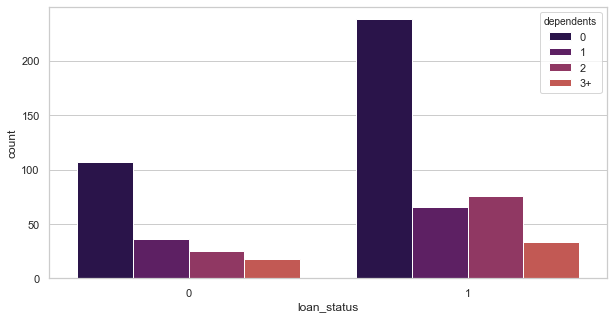

In [87]:
plt.figure(figsize = (10, 5))
sns.countplot(train["loan_status"], hue = combo_trte["dependents"])
plt.show()

2. gender

In [88]:
combo_trte["gender"].value_counts()

Male      775
Female    182
Name: gender, dtype: int64

3. married

In [89]:
combo_trte["married"].value_counts()

Yes    631
No     347
Name: married, dtype: int64

4. self_employed

In [90]:
combo_trte["self_employed"].value_counts()

No     807
Yes    119
Name: self_employed, dtype: int64

In [91]:
#imputing the missing values with mode for all categorical columns
def impute(col):
    
    for col in combo_trte:
        combo_trte[col].fillna(combo_trte[col].mode()[0], inplace = True)
        

impute("dependents")
impute("gender")
impute("married")
impute("self_employed")

### **<font color = red>Vi</font><font color = orange>su</font><font color = yellow>al</font><font color = green>iz</font><font color = blue>at</font><font color = indigo>io</font><font color = violet>ns</font>**

#### <font color = maroon>Numerical</font> variables

In [46]:
numerical_cols.columns

Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history'],
      dtype='object')

1. applicant income

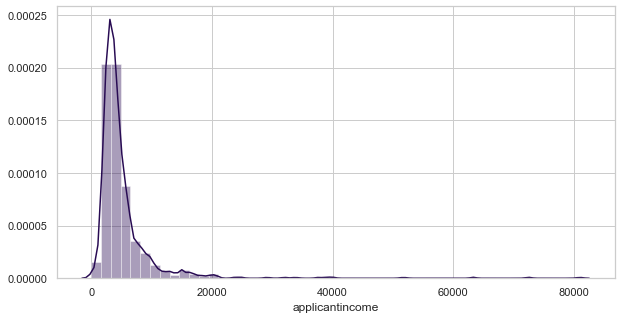

In [47]:
plt.figure(figsize = (10, 5))
sns.distplot(combo_trte["applicantincome"])
plt.show()

2. coapplicant income

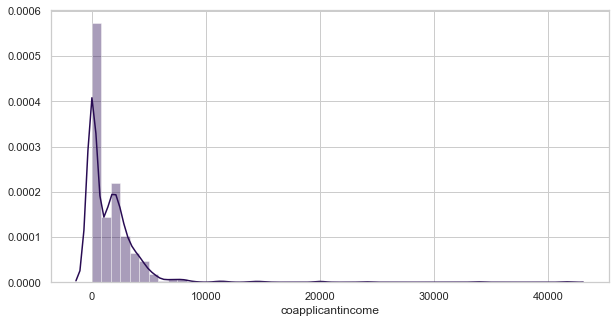

In [360]:
plt.figure(figsize = (10, 5))
sns.distplot(combo_trte["coapplicantincome"])
plt.show() 

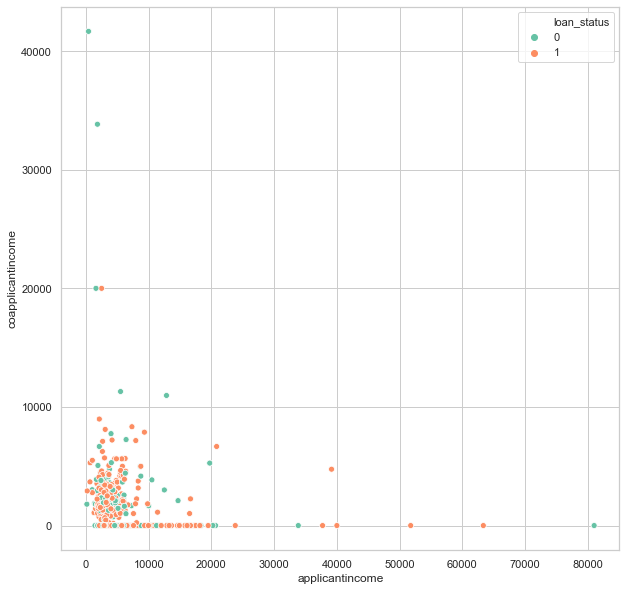

In [361]:
# checking the relationship of applicant and coapplicant income with laon_status
plt.figure(figsize = (10, 10))
sns.scatterplot(x = "applicantincome", y = "coapplicantincome", data = train, hue = "loan_status", palette = "Set2")
plt.show()

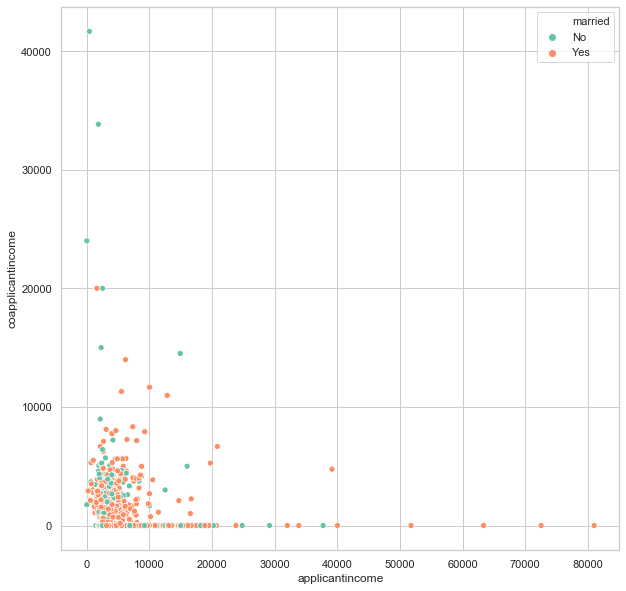

In [362]:
# checking the relationship of applicant and coapplicant income with their married status
plt.figure(figsize = (10, 10))
sns.scatterplot(x = "applicantincome", y = "coapplicantincome", data = combo_trte, hue = "married", palette = "Set2")
plt.show()

In [363]:
#Outlier? maybe?
#train[(train["applicantincome"] > 80000) & (train["coapplicantincome"] == 0)]

3. loanamount

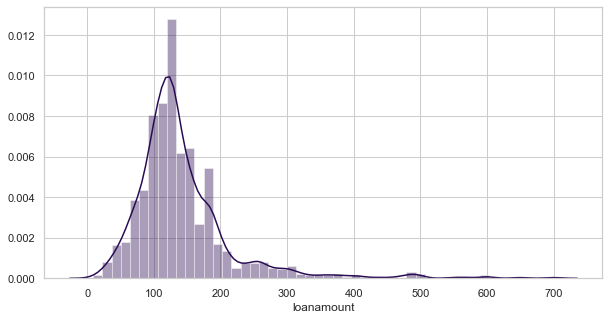

In [365]:
#loanamount
plt.figure(figsize = (10,5))
sns.distplot(combo_trte["loanamount"])
plt.show()

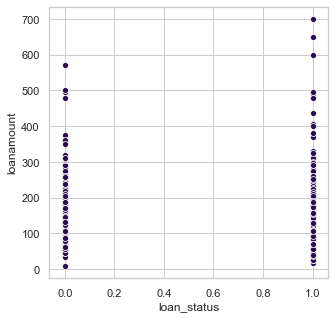

In [366]:
#checking the relation of loanamount with loan_status
plt.figure(figsize = (5,5))
sns.scatterplot(train["loan_status"], train["loanamount"])
plt.show()

4. loan_amount_term

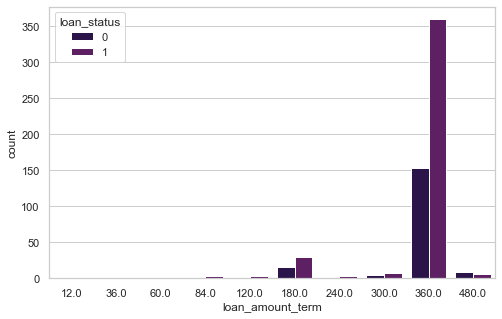

In [31]:
#loan_amount_term with respect to loan_status
plt.figure(figsize = (8,5))
sns.countplot(train["loan_amount_term"], hue = train["loan_status"])
plt.legend(title = "loan_status", loc = 2)
plt.show()

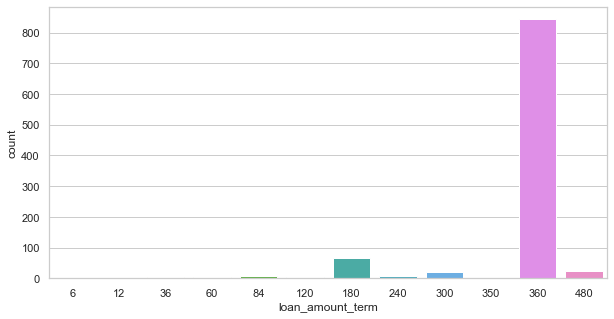

In [368]:
plt.figure(figsize = (10, 5))
sns.countplot(combo_trte["loan_amount_term"])
plt.show()

In [92]:
len(combo_trte[combo_trte["loan_amount_term"] == 360])/len(combo_trte["loan_amount_term"])*100

85.93272171253822

In [93]:
#Since loan_amount_term has 360 as the major distributory class, so combining the other sparse classes into "others".
#need to convert it into string to do that
combo_trte["loan_amount_term"] = combo_trte["loan_amount_term"].astype(str) 

In [94]:
combo_trte["loan_amount_term"].dtype

dtype('O')

In [95]:
temp = combo_trte["loan_amount_term"].value_counts()
temp.head()

360    843
180     66
480     23
300     20
240      8
Name: loan_amount_term, dtype: int64

In [96]:
combo_trte["term_count"] = combo_trte["loan_amount_term"].apply(lambda x: temp[x])
combo_trte[["loan_amount_term", "term_count"]].head()

,loan_amount_term,term_count
0,360,843
1,360,843
2,360,843
3,360,843
4,360,843


In [97]:
#separating loan_amount_term into 360 and other classes

for i in range(0, len(combo_trte)):
    if combo_trte["term_count"][i] < 843:
        combo_trte["loan_amount_term"][i] = "others"

In [98]:
combo_trte["loan_amount_term"].value_counts()

360       843
others    138
Name: loan_amount_term, dtype: int64

In [99]:
combo_trte = combo_trte.drop("term_count", axis = 1)

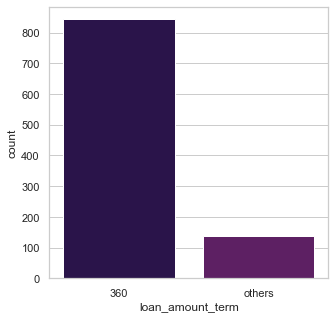

In [100]:
plt.figure(figsize = (5, 5))
sns.countplot(combo_trte["loan_amount_term"])
plt.show()

5. credit_history

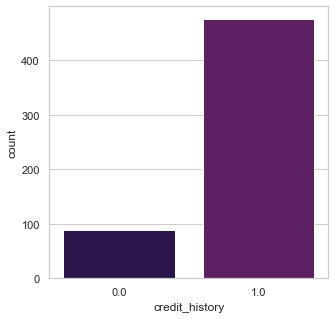

In [57]:
plt.figure(figsize = (5,5))
sns.countplot(train["credit_history"])
plt.show()

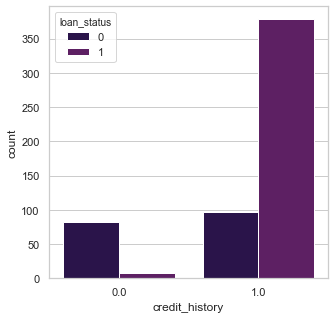

In [380]:
plt.figure(figsize = (5,5))
sns.countplot(train["credit_history"], hue = train["loan_status"])
plt.show()

In [58]:
len(combo_trte[combo_trte["credit_history"] == 1.0])/len(combo_trte["loan_amount_term"])*100

84.91335372069318

#### Some inference after the above analysis -
- **High** right skewness in applicants and coapplicants income variables
- Major distribution lies within: applicant income < **20000** and coapplicant income < **10000**
- Not removing any outliers in benchmark model, because of low dataset size
- Log transformation needs to be done for skewness, to make the data more centric in distribution 
- loanamount variable also has high right skewness, applicants applied for high loan amount were **approved** for loan as well
- Approx. **86%** of the applicants preferred **360 months** as loan repayment term period, this segment also has the highest approval rate of all.
- Approx. **85%** of applicants already have a credit history, only 1/4th of the applicants despite having a credit history were rejected for the loan, also some of them (not a significant amount) without a credit history were also approved. So, credit history is not the sole factor for the approval scrutiny.

#### <font color = maroon>Categorical</font> variables

In [382]:
categorical_cols.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area'],
      dtype='object')

1. gender

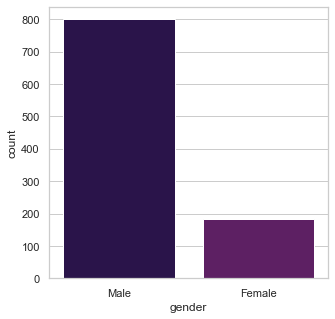

In [383]:
plt.figure(figsize = (5,5))
sns.countplot(combo_trte["gender"])
plt.show()

In [59]:
male_ratio = len(combo_trte[combo_trte["gender"] == "Male"])/len(combo_trte)*100
female_ratio = len(combo_trte[combo_trte["gender"] == "Female"])/len(combo_trte)*100

print("Male to female ratio = {:.2f}:{:.2f}".format(male_ratio, female_ratio) )

Male to female ratio = 81.45:18.55


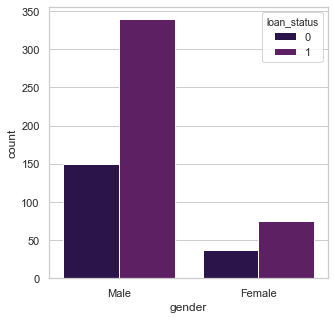

In [385]:
#gender count with respect to loan_status 
plt.figure(figsize = (5,5))
sns.countplot(train["gender"], hue = train["loan_status"])
plt.show()

2. married

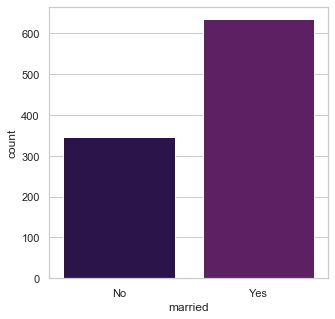

In [386]:
plt.figure(figsize = (5,5))
sns.countplot(combo_trte["married"])
plt.show()

In [387]:
married_ratio = len(combo_trte[combo_trte["married"] == "Yes"])/len(combo_trte)*100
unmarried_ratio = len(combo_trte[combo_trte["married"] == "No"])/len(combo_trte)*100

print("Married to unmarried ratio = {:.2f}:{:.2f}".format(married_ratio, unmarried_ratio) )

Married to unmarried ratio = 64.63:35.37


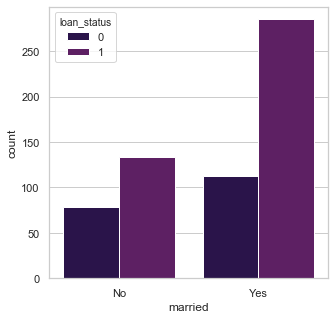

In [388]:
#married ratio with respect to loan_status
plt.figure(figsize = (5,5))
sns.countplot(train["married"], hue = train["loan_status"])
plt.show()

3. dependents

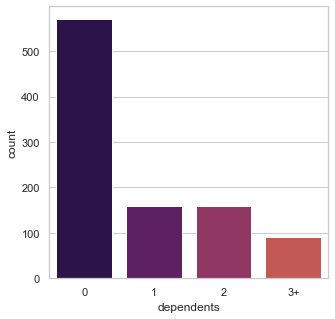

In [389]:
plt.figure(figsize = (5,5))
sns.countplot(combo_trte["dependents"])
plt.show()

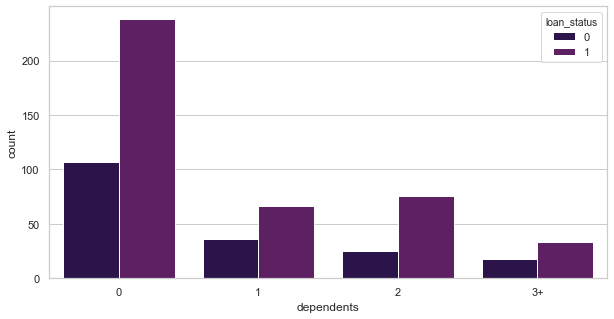

In [390]:
#dependents with respect to laon_status
plt.figure(figsize = (10,5))
sns.countplot(train["dependents"], hue = train["loan_status"])
plt.show()

4. education

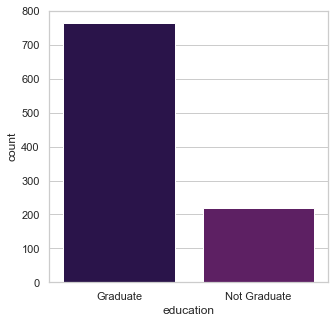

In [391]:
plt.figure(figsize = (5,5))
sns.countplot(combo_trte["education"])
plt.show()

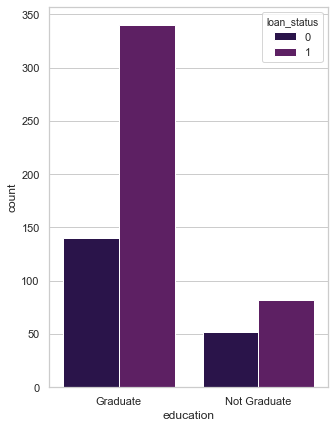

In [392]:
#education ratio with respect to loan_status
plt.figure(figsize = (5,7))
sns.countplot(train["education"], hue = train["loan_status"])
plt.show()

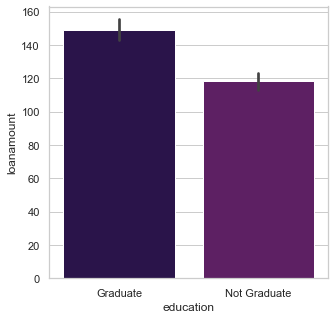

In [51]:
#education ratio with respect to applicantincome
plt.figure(figsize = (5,5))
sns.barplot(combo_trte["education"], combo_trte["loanamount"])
plt.show()

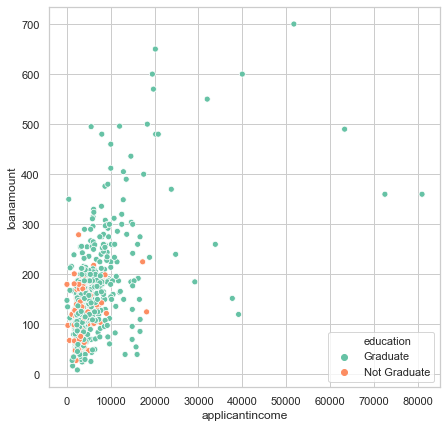

In [52]:
#applicant vs loanamount with respect to education
plt.figure(figsize = (7,7))
sns.scatterplot(combo_trte["applicantincome"], combo_trte["loanamount"], hue = combo_trte["education"], palette = "Set2")
plt.legend(loc = 4)
plt.show()

5. self_employed

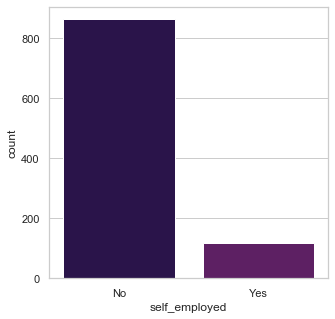

In [394]:
plt.figure(figsize = (5,5))
sns.countplot(combo_trte["self_employed"])
plt.show()

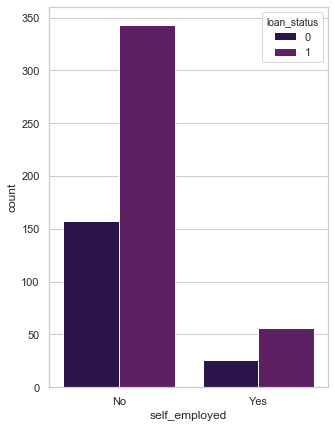

In [395]:
#self_employed with respect to loan_status
plt.figure(figsize = (5,7))
sns.countplot(train["self_employed"], hue = train["loan_status"])
plt.show()

6. property_area

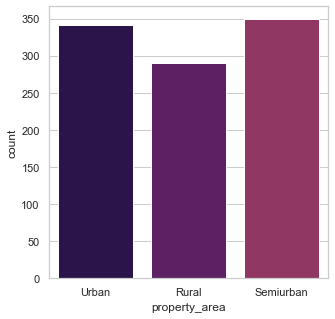

In [396]:
plt.figure(figsize = (5,5))
sns.countplot(combo_trte["property_area"])
plt.show()

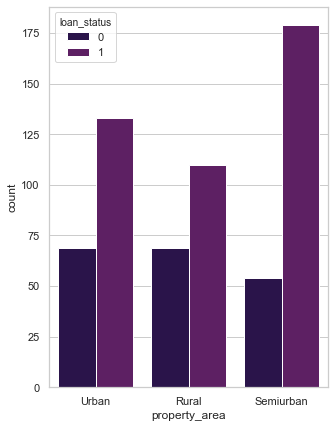

In [397]:
#property_area with respect to loan_status
plt.figure(figsize = (5,7))
sns.countplot(train["property_area"], hue = train["loan_status"])
plt.show()

In [398]:
semiurb_pa = len(train[(train["property_area"] == "Semiurban") & (train["loan_status"] == 1)])/len(train)*100
semiurb_pa

29.153094462540718

In [399]:
semi_pa = len(train[(train["property_area"] == "Semiurban") & (train["loan_status"] == 0)])/len(train)*100
semi_pa

8.794788273615636

In [400]:
urb_pa = len(train[(train["property_area"] == "Urban") & (train["loan_status"] == 1)])/len(train)*100
urb_pa

21.661237785016286

In [401]:
urb_pa0 = len(train[(train["property_area"] == "Urban") & (train["loan_status"] == 0)])/len(train)*100
urb_pa0

11.237785016286644

In [402]:
rur_pa = len(train[(train["property_area"] == "Rural") & (train["loan_status"] == 1)])/len(train)*100
rur_pa

17.91530944625407

In [403]:
rur_pa0 = len(train[(train["property_area"] == "Rural") & (train["loan_status"] == 0)])/len(train)*100
rur_pa0

11.237785016286644

##### Calculating Approval Rating Ratio (%age of property area with approved loan/ % with rejected loan status)

In [404]:
#approval rating of semiurban property area
semiurban_ar = semiurb_pa/semi_pa
semiurban_ar

3.314814814814815

In [405]:
#approval rating of urban property area
urban_ar = urb_pa/urb_pa0
urban_ar

1.927536231884058

In [406]:
#approval rating of rural property area
rural_ar = rur_pa/rur_pa0
rural_ar

1.5942028985507248

#### Some inferences after the above analysis -
- Male applicants are higher as compared to female **(81:18)**, even though female count is significantly lower but the count of females approved for the loan are twice more than their rejected counterpart.
- Married applicants have more percentage **(64.63%)** than unmarried, married applicants have more than double the chance of loan approval.
- Applicants with no dependents have highest approval rate than the others.
- Applicants with atleast graduate degree have higher approval than non-graduates.
- Self employed applicants are really low in count than applicants having a job.
- Approval rating ratio of applicants with semi-urban property area is highest among urban and rural property areas.

#### Precessing so far...

- train test datasets combined, 981 x 11
- missing values problem fixed
- derived some basic insights 
- some numerical columns have high skewness

#### To do task now -

- categorical variables to be converted to numerical
- handle the skewness
- scaling the dataset
- to finally prepare the dataset for model fitting
- feature selection 
- model fitting
- prediction
- evaluation 
- optimisation
- final prediction on test dataset
- submission

## Feature processing

In [101]:
#Creating a new feature by adding up applicantincome and coapplicantincome
combo_trte["total_income"] = combo_trte["applicantincome"] + combo_trte["coapplicantincome"]

In [102]:
combo_trte = combo_trte.drop(["applicantincome", "coapplicantincome"], axis = 1)
combo_trte

,gender,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,total_income
0,Male,No,0,Graduate,No,126.0,360,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,360,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,360,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,113.0,360,1.0,Urban,5786.0
977,Male,Yes,0,Graduate,No,115.0,360,1.0,Urban,4867.0
978,Male,No,0,Graduate,No,126.0,360,1.0,Semiurban,5243.0
979,Male,Yes,0,Graduate,No,158.0,360,1.0,Rural,7393.0


In [245]:
#creating a column depicting monthly payment
#combo_trte["monthly_payment"] = np.round((combo_trte["loanamount"]*1000)/combo_trte["loan_amount_term"],1)

In [99]:
#creating another column which tells us the ratio between monthly payment and total income, lesser the better
#can be used to set a threshold for considering the particular loan status
#combo_trte["repayment_percent"] = np.round((combo_trte["monthly_payment"]/combo_trte["total_income"])*100,2)

In [248]:
#sns.distplot(combo_trte["repayment_percent"])
#plt.show()

In [103]:
#Credit_history was in float, hence, the conversion
combo_trte["credit_history"] = combo_trte["credit_history"].astype(int)

#### Categorical to numerical conversion

In [62]:
#label encoding

#from sklearn.preprocessing import LabelEncoder

#cols = ("education", "dependents")

#for col in cols:
    #lbe = LabelEncoder()
    #combo_trte[col] = lbe.fit_transform(list(combo_trte[col].values))
    
#print("Shape of data = {}".format(combo_trte.shape))

In [104]:
#Using .map() for ordinal variables since label encoder was assigning the labels with improper order
combo_trte["education"] = combo_trte["education"].map({"Not Graduate": 0, "Graduate": 1})
combo_trte["loan_amount_term"] = combo_trte["loan_amount_term"].map({"others": 0, "360": 1}) #considering in ordinal categ.
combo_trte["dependents"] = combo_trte["dependents"].map({"3+": 0 , "1": 1, "2": 2, "0": 3})
combo_trte.head()

,gender,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,total_income
0,Male,No,3,1,No,126.0,1,1,Urban,5849.0
1,Male,Yes,1,1,No,128.0,1,1,Rural,6091.0
2,Male,Yes,3,1,Yes,66.0,1,1,Urban,3000.0
3,Male,Yes,3,0,No,120.0,1,1,Urban,4941.0
4,Male,No,3,1,No,141.0,1,1,Urban,6000.0


In [105]:
#Converting the rest of the categorical variables with get_dummies
combo_trte = pd.get_dummies(combo_trte)
combo_trte

,dependents,education,loanamount,loan_amount_term,credit_history,total_income,gender_Female,gender_Male,married_No,married_Yes,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,1,126.0,1,1,5849.0,0,1,1,0,1,0,0,0,1
1,1,1,128.0,1,1,6091.0,0,1,0,1,1,0,1,0,0
2,3,1,66.0,1,1,3000.0,0,1,0,1,0,1,0,0,1
3,3,0,120.0,1,1,4941.0,0,1,0,1,1,0,0,0,1
4,3,1,141.0,1,1,6000.0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0,0,113.0,1,1,5786.0,0,1,0,1,0,1,0,0,1
977,3,1,115.0,1,1,4867.0,0,1,0,1,1,0,0,0,1
978,3,1,126.0,1,1,5243.0,0,1,1,0,1,0,0,1,0
979,3,1,158.0,1,1,7393.0,0,1,0,1,1,0,1,0,0


In [123]:
#Log transformation for skewness

#from scipy import stats
#from scipy.stats import norm, skew 

#numeric_feats = combo_trte.dtypes[combo_trte.dtypes != "object"].index

#skewed_feats = combo_trte[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
#print("\nSkew in numerical features: \n")
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#skewness.head(10)

In [124]:
#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:

    #combo_trte[feat] = boxcox1p(combo_trte[feat], lam)

In [417]:
#treating the skewness with the help of Box-cox transformation
from scipy.special import boxcox1p

combo_trte[["loanamount", "total_income"]] = boxcox1p(combo_trte[["loanamount", "total_income"]], 0.15)

#### Final check of our datasets after preprocessing

In [418]:
#no missing values, skewness fixed, all vars in numerical format
#scaling left
combo_trte.head()

,dependents,education,loanamount,loan_amount_term,credit_history,total_income,gender_Female,gender_Male,married_No,married_Yes,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,1,7.120636,1,1,17.822958,0,1,1,0,1,0,0,0,1
1,1,1,7.152988,1,1,17.972313,0,1,0,1,1,0,1,0,0
2,3,1,5.859551,1,1,15.489705,0,1,0,1,0,1,0,0,1
3,3,0,7.020909,1,1,17.211125,0,1,0,1,1,0,0,0,1
4,3,1,7.353462,1,1,17.916752,0,1,1,0,1,0,0,0,1


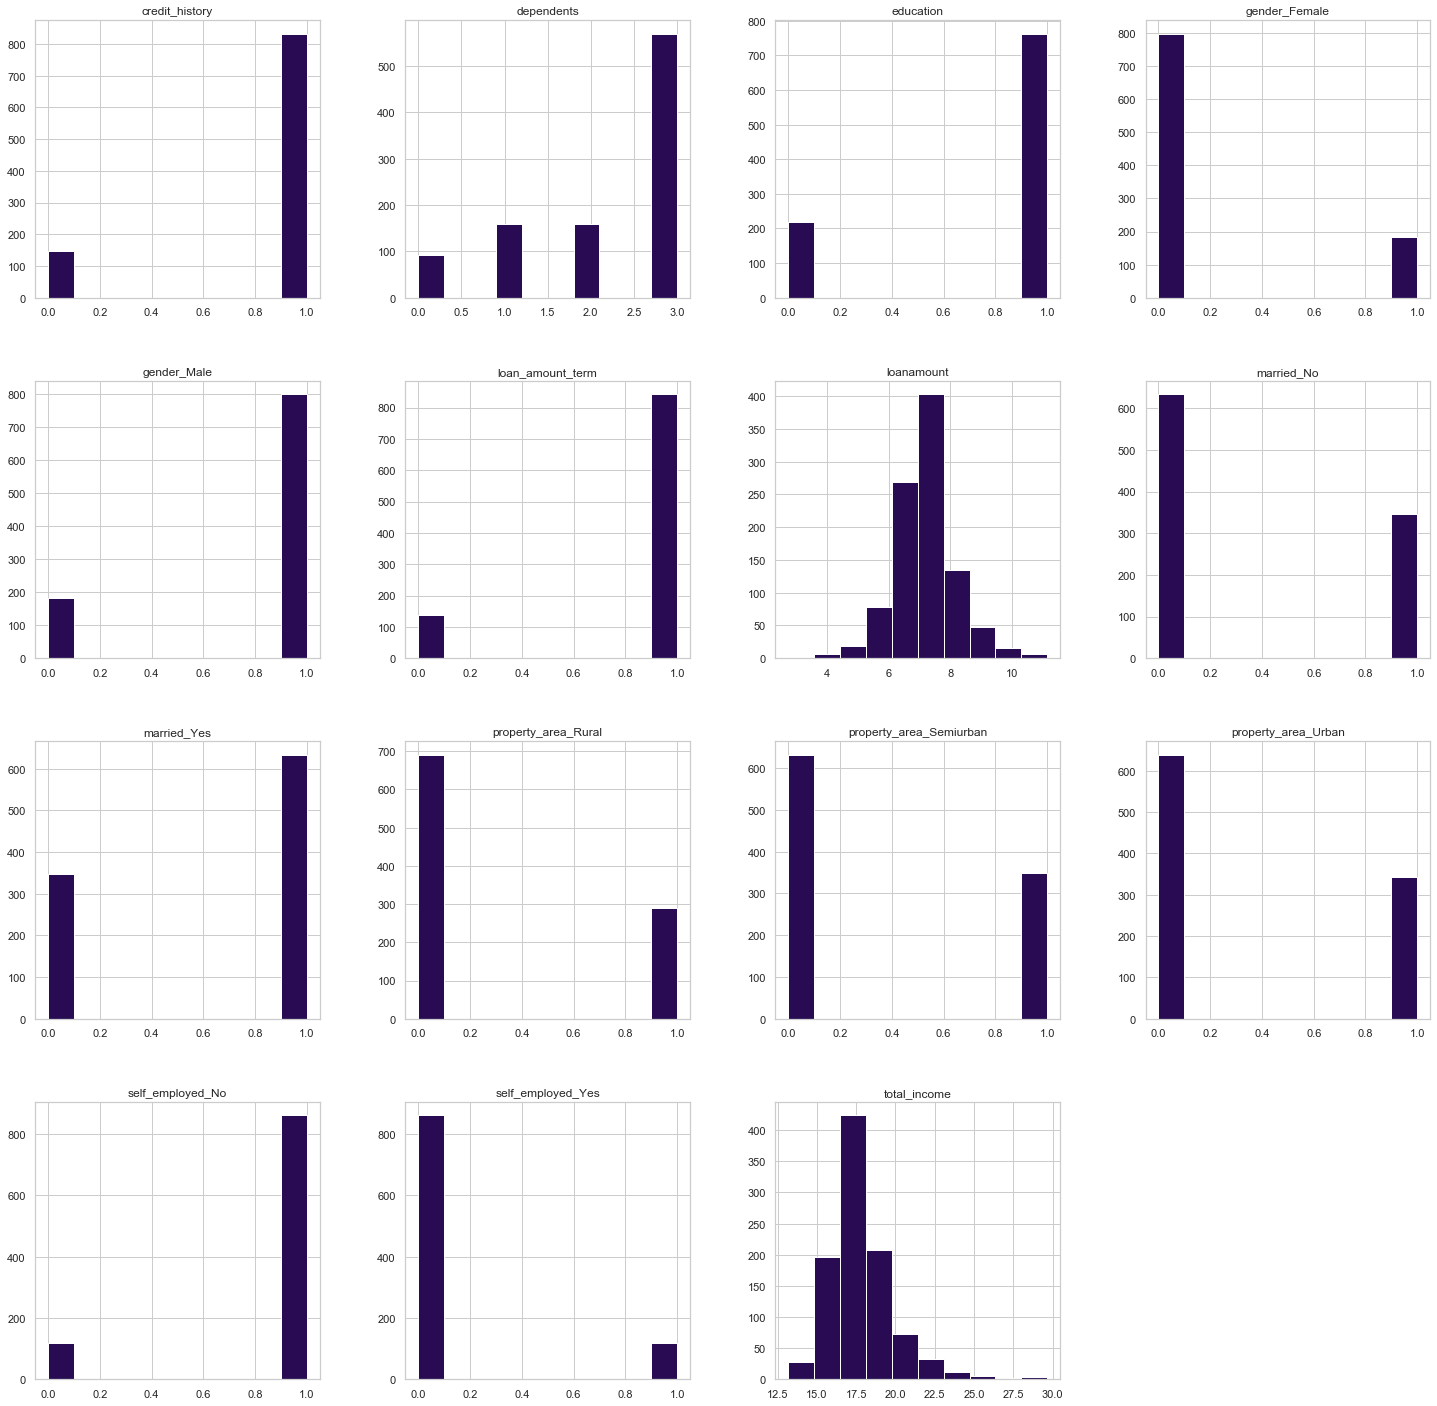

In [419]:
combo_trte.hist(figsize = (25,25))
plt.show()

#### Spliting the combined data back to train and test

In [420]:
#saving the processed data externally, creating a checkpoint
#combo_trte.to_csv("processed_data.csv", index = False)

In [106]:
sober_data = pd.read_csv("processed_data.csv")
sober_data

,dependents,education,loanamount,loan_amount_term,credit_history,total_income,gender_Female,gender_Male,married_No,married_Yes,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,1,7.120636,1,1,17.822958,0,1,1,0,1,0,0,0,1
1,1,1,7.152988,1,1,17.972313,0,1,0,1,1,0,1,0,0
2,3,1,5.859551,1,1,15.489705,0,1,0,1,0,1,0,0,1
3,3,0,7.020909,1,1,17.211125,0,1,0,1,1,0,0,0,1
4,3,1,7.353462,1,1,17.916752,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0,0,6.899104,1,1,17.783215,0,1,0,1,0,1,0,0,1
977,3,1,6.934540,1,1,17.157149,0,1,0,1,1,0,0,0,1
978,3,1,7.120636,1,1,17.424517,0,1,1,0,1,0,0,1,0
979,3,1,7.593293,1,1,18.698672,0,1,0,1,1,0,1,0,0


In [107]:
#splitting into train and test dataset
train = sober_data.iloc[:rtrain]
test = sober_data.iloc[rtrain:]

In [15]:
train

,dependents,education,loanamount,loan_amount_term,credit_history,total_income,gender_Female,gender_Male,married_No,married_Yes,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,1,7.120636,1,1,17.822958,0,1,1,0,1,0,0,0,1
1,1,1,7.152988,1,1,17.972313,0,1,0,1,1,0,1,0,0
2,3,1,5.859551,1,1,15.489705,0,1,0,1,0,1,0,0,1
3,3,0,7.020909,1,1,17.211125,0,1,0,1,1,0,0,0,1
4,3,1,7.353462,1,1,17.916752,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3,1,5.995517,1,1,15.377359,1,0,1,0,1,0,1,0,0
610,0,1,4.969939,0,1,16.557356,0,1,0,1,1,0,1,0,0
611,1,1,8.631303,1,1,19.148350,0,1,0,1,1,0,0,0,1
612,2,1,7.956197,1,1,18.795391,0,1,0,1,1,0,0,0,1


In [108]:
test.reset_index(inplace = True, drop = True)
test

,dependents,education,loanamount,loan_amount_term,credit_history,total_income,gender_Female,gender_Male,married_No,married_Yes,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,1,6.844946,1,1,17.741184,0,1,0,1,1,0,0,0,1
1,1,1,7.120636,1,1,16.937892,0,1,0,1,1,0,0,0,1
2,2,1,8.190318,1,1,18.382579,0,1,0,1,1,0,0,0,1
3,2,1,6.654950,1,1,17.171074,0,1,0,1,1,0,0,0,1
4,3,0,6.172972,1,1,15.784050,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0,6.899104,1,1,17.783215,0,1,0,1,0,1,0,0,1
363,3,1,6.934540,1,1,17.157149,0,1,0,1,1,0,0,0,1
364,3,1,7.120636,1,1,17.424517,0,1,1,0,1,0,0,1,0
365,3,1,7.593293,1,1,18.698672,0,1,0,1,1,0,1,0,0


### Scaling

In [109]:
train_cols = train[["loanamount", "total_income"]]
test_cols = test[["loanamount", "total_income"]]

In [110]:
def scaled_data(data, column, scaler):
    for col in column:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [111]:
scaler = StandardScaler()
train_scaled = scaled_data(train, train_cols, scaler)
test_scaled = scaled_data(test, test_cols, scaler)

## Modelling

### <font color = sky_blue>Logistic</font> Regression

In [112]:
x_train, x_test, y_train, y_test = train_test_split(train_scaled, y, test_size = 0.2, random_state = 24)

In [113]:
#instantiating the model
logreg = LogisticRegression(C = 0.1, l1_ratio = 0.00001, penalty = "l2", random_state  = 24) #HYPM derived from grid search CV down below
bench_model = logreg.fit(x_train, y_train)

In [114]:
y_train_pred = logreg.predict(x_train)
y_pred = logreg.predict(x_test)

print("Train set score: ",accuracy_score(y_train_pred, y_train)*100) #80.24
print("Test set score: ",accuracy_score(y_pred, y_test)*100) #83.73

Train set score:  80.24439918533605
Test set score:  83.73983739837398


In [116]:
pd.Series(y_pred).value_counts() 

1    107
0     16
dtype: int64

In [117]:
pd.Series(y_test).value_counts()

1    89
0    34
dtype: int64

In [118]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15, 19],
       [ 1, 88]], dtype=int64)

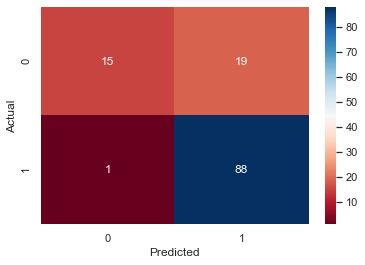

In [132]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdBu", fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
roc_auc_score(y_test, y_pred)

0.7149702577660277

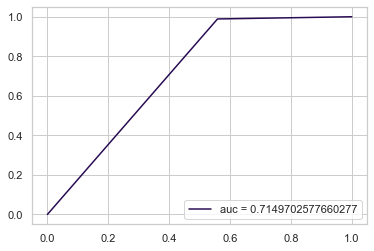

In [133]:
#ROC-AUC curve
y_pred_prob = logreg.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

Train set score:  79.83706720977597
Test set score:  82.92682926829268


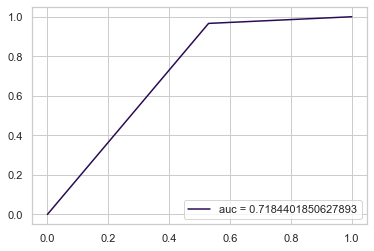

In [143]:
#using the PCA reduced data to check for accuacy and roc-auc score
x_train, x_test, y_train, y_test = train_test_split(bench_pca, y, test_size = 0.2, random_state = 24)
logreg = LogisticRegression()
bench_model = logreg.fit(x_train, y_train)

y_train_pred = logreg.predict(x_train)
y_pred = logreg.predict(x_test)

print("Train set score: ",accuracy_score(y_train_pred, y_train)*100)
print("Test set score: ",accuracy_score(y_pred, y_test)*100)

y_pred_prob = logreg.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

#### Checking if imbalance-fix can raise the accuracy

 1. **Random Undersampling**

Target Class distribution: Counter({1: 422, 0: 192})
Target Class distribution after RUS: Counter({0: 192, 1: 192})
Accuracy after RUS on train set: 75.9%
Accuracy after RUS on test set: 63.64%


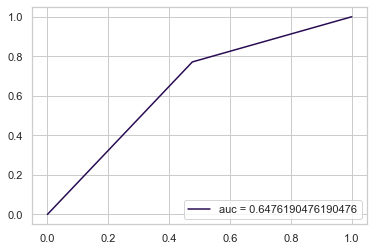

In [135]:
print("Target Class distribution: {}".format(Counter(y))) #telling the class count

rus = RandomUnderSampler(random_state = 24)
x_rus, y_rus = rus.fit_resample(train_scaled, y)

print("Target Class distribution after RUS: {}".format(Counter(y_rus)))

x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 24)
logreg.fit(x_train, y_train)
y_train_pred = logreg.predict(x_train)
y_pred = logreg.predict(x_test)
print("Accuracy after RUS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after RUS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

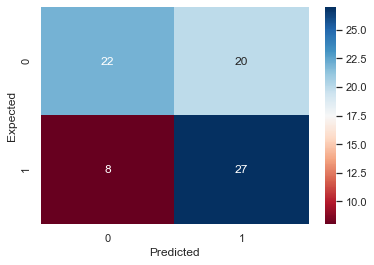

In [136]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdBu", fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Accuracy after RUS on train set: 75.24%
Accuracy after RUS on test set: 63.64%


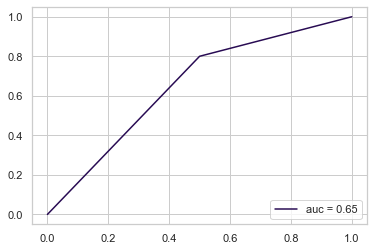

In [147]:
#PCA reduced undersampling

x_train, x_test, y_train, y_test = train_test_split(rus_pca, y_rus, test_size = 0.2, random_state = 24)
logreg.fit(x_train, y_train)
y_train_pred = logreg.predict(x_train)
y_pred = logreg.predict(x_test)
print("Accuracy after RUS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after RUS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))


y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

2. **Random Oversampling**

Target Class distribution: Counter({1: 422, 0: 192})
Target Class distribution after ROS: Counter({1: 422, 0: 422})
Accuracy after ROS on train set: 72.74%
Accuracy after ROS on test set: 69.82%


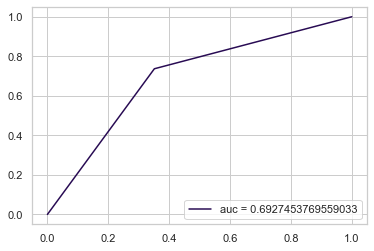

In [137]:
print("Target Class distribution: {}".format(Counter(y)))

ros = RandomOverSampler(random_state = 24)
x_ros, y_ros = ros.fit_resample(train_scaled, y)

print("Target Class distribution after ROS: {}".format(Counter(y_ros)))

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 24)
logreg.fit(x_train, y_train)
y_train_pred = logreg.predict(x_train)
y_pred = logreg.predict(x_test)
print("Accuracy after ROS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after ROS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

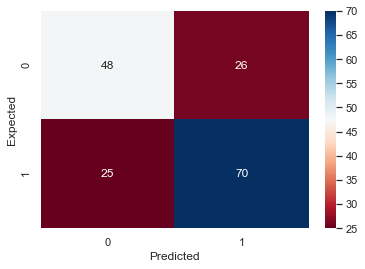

In [138]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdBu", fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Accuracy after ROS: 70.41%


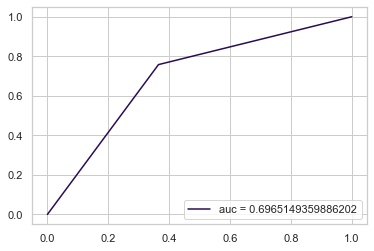

In [148]:
#PCA reduced oversampling

x_train, x_test, y_train, y_test = train_test_split(ros_pca, y_ros, test_size = 0.2, random_state = 24)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("Accuracy after ROS: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

3. **SMOTE**

Target Class distribution: Counter({1: 422, 0: 192})
Target Class distribution after SMOTE: Counter({1: 422, 0: 422})
Accuracy after SMOTE on train set: 75.85%
Accuracy after SMOTE on test set: 75.15%


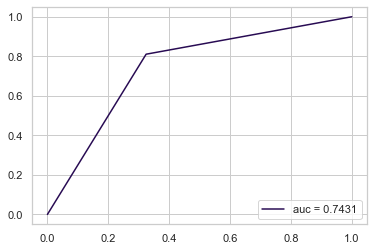

In [139]:
print("Target Class distribution: {}".format(Counter(y)))

smote = SMOTE(random_state = 24)
x_sm, y_sm = smote.fit_resample(train_scaled, y)

print("Target Class distribution after SMOTE: {}".format(Counter(y_sm)))

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 24)
logreg.fit(x_train, y_train)
y_train_pred = logreg.predict(x_train)
y_pred = logreg.predict(x_test)
print("Accuracy after SMOTE on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after SMOTE on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

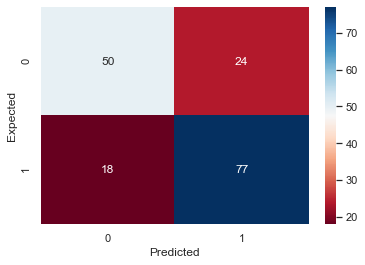

In [140]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdBu", fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Accuracy after SMOTE: 72.78%


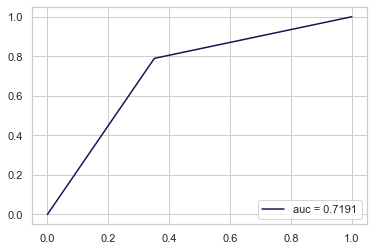

In [155]:
#PCA reduced SMOTE

x_train, x_test, y_train, y_test = train_test_split(smote_pca, y_sm, test_size = 0.2, random_state = 24)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("Accuracy after SMOTE: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr, label = "auc = {}".format(auc))
plt.legend(loc = 4)
plt.show()

### Trying PCA

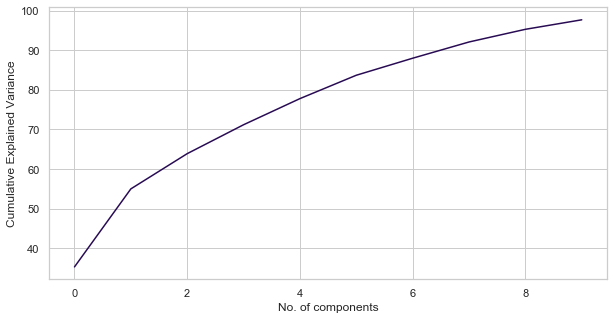

In [141]:
pca = PCA(n_components = 10, random_state = 24)
bench_pca = pca.fit_transform(train_scaled)
#pca2 = pca.fit_transform(train_scaled)

vari = np.cumsum(np.round(pca.explained_variance_ratio_, 3)*100)
plt.figure(figsize = (10, 5))
plt.plot(vari)
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [142]:
vari

array([35.3, 55. , 63.9, 71.2, 77.8, 83.7, 88. , 92.1, 95.3, 97.7])

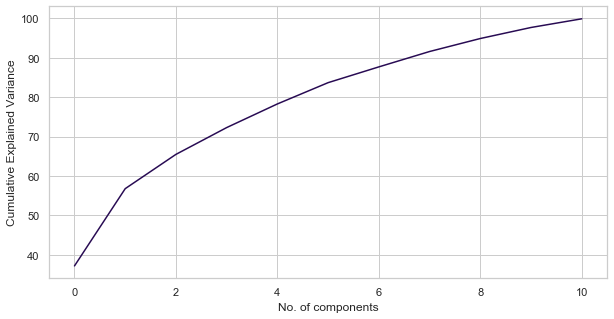

In [144]:
#on undersampled data
pca = PCA(n_components = 11, random_state = 24)
rus_pca = pca.fit_transform(x_rus)

var1 = np.cumsum(np.round(pca.explained_variance_ratio_, 3)*100)
plt.figure(figsize = (10, 5))
plt.plot(var1)
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

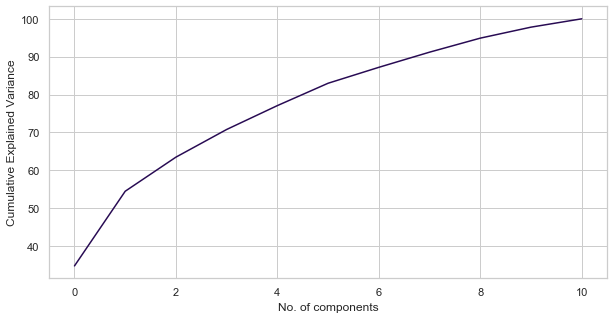

In [149]:
#on oversampled data
pca = PCA(n_components = 11, random_state = 24)
ros_pca = pca.fit_transform(x_ros)

var1 = np.cumsum(np.round(pca.explained_variance_ratio_, 3)*100)
plt.figure(figsize = (10, 5))
plt.plot(var1)
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [43]:
var1

array([ 34.8,  54.5,  63.5,  70.8,  77.1,  83. ,  87.2,  91.2,  94.9,
        97.8, 100. ])

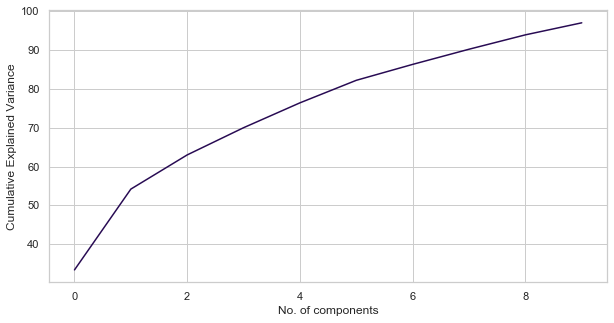

In [154]:
#on SMOTE data
pca = PCA(n_components = 10, random_state = 24)
smote_pca = pca.fit_transform(x_sm)

var1 = np.cumsum(np.round(pca.explained_variance_ratio_, 3)*100)
plt.figure(figsize = (10, 5))
plt.plot(var1)
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [152]:
var1

array([33.4, 54.2, 63. , 70. , 76.4, 82.2, 86.3, 90.2, 93.9, 97. ])

#### Trying K-fold Cross Validation with **LogReg**

In [156]:
n_folds = 10


def score(model, data, y_data):
    kf = KFold(n_folds, shuffle = True, random_state = 24).get_n_splits(data)
    accuracy = cross_val_score(model, data, y_data, scoring = "accuracy", cv = kf)
    RA_score = cross_val_score(model, data, y_data, scoring = "roc_auc", cv = kf)
    
    return print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy.mean()*100, RA_score.mean()*100))

In [157]:
#bechmark model score
model_score = score(logreg, train_scaled, y)
model_score

Accuracy Score: 80.80% 
ROC-AUC Score: 75.41%


In [158]:
#score of PCA reduced model
model_score = score(logreg, bench_pca, y)
model_score

Accuracy Score: 79.82% 
ROC-AUC Score: 75.86%


In [159]:
#undersampled logreg score
rus_model_score = score(logreg, x_rus, y_rus)
rus_model_score

Accuracy Score: 71.15% 
ROC-AUC Score: 76.74%


In [163]:
#undersampled PCA-reduced model score
# rus_model_score = score(logreg, rus_pca, y_rus)
# rus_model_score

In [161]:
#oversampled model score
ros_model_score = score(logreg, x_ros, y_ros)
ros_model_score

Accuracy Score: 70.74% 
ROC-AUC Score: 78.17%


In [164]:
#oversampled PCA-reduced model score
# ros_model_score = score(logreg, ros_pca, y_ros)
# ros_model_score

In [165]:
#SMOTE model score
smote_model_score = score(logreg, x_sm, y_sm)
smote_model_score

Accuracy Score: 76.44% 
ROC-AUC Score: 84.04%


- Getting good score on SMOTE model with 10 folds

### <font color = sky_blue>Decision Tree</font> Classifier

In [167]:
d_tree = DecisionTreeClassifier(random_state = 24) #benchmark model instance

dtc = DecisionTreeClassifier(criterion = "gini", max_depth = 8, max_features = 7,  #HYPM tuned instance
                              min_samples_leaf = 6, min_samples_split = 10,
                              random_state = 24)

In [170]:
#with imbalanced target class and un-tuned model

# x_train, x_test, y_train, y_test = train_test_split(train_scaled, y, test_size = 0.3, shuffle = True, random_state = 24)
# bench_model = d_tree.fit(x_train, y_train)
# y_train_pred = bench_model.predict(x_train)
# y_pred = bench_model.predict(x_test)
# print("Accuracy on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #80.24
# print("Accuracy on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #83.74

# y_pred_prob = bench_model.predict_proba(x_test)[:,1]
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)
# plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
# plt.legend(loc = 4)
# plt.show() #0.6978

Accuracy on train set: 82.89%
Accuracy on test set: 81.3%


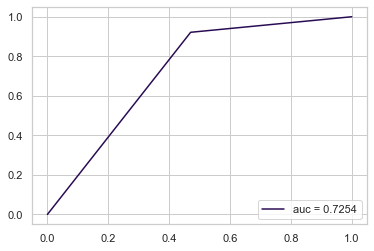

In [178]:
#with imbalanced target class and tuned HYPMs

x_train, x_test, y_train, y_test = train_test_split(train_scaled, y, test_size = 0.2, shuffle = True, random_state = 24)
bench_model = dtc.fit(x_train, y_train)
y_train_pred = bench_model.predict(x_train)
y_pred = bench_model.predict(x_test)
print("Accuracy on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #80.24
print("Accuracy on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #83.74

y_pred_prob = bench_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.6978

Accuracy after RUS on train set: 80.78%
Accuracy after RUS on test set: 68.83%


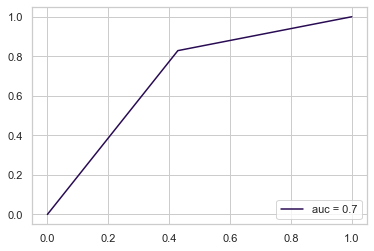

In [179]:
#undersampling with DTC

x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, shuffle = True, random_state = 24)
model1 = dtc.fit(x_train, y_train)
y_train_pred = model1.predict(x_train)
y_pred = model1.predict(x_test)
print("Accuracy after RUS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after RUS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = model1.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show()

Accuracy after ROS on train set: 82.52%
Accuracy after ROS on test set: 73.96%


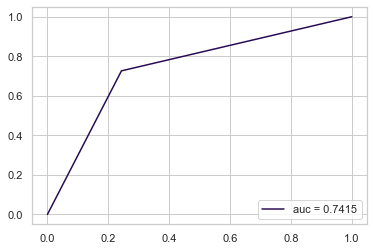

In [180]:
#oversampling with DTC

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 24)
model2 = dtc.fit(x_train, y_train)
y_train_pred = model2.predict(x_train)
y_pred = model2.predict(x_test)
print("Accuracy after ROS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after ROS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = model2.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show()

Accuracy after SMOTE on train set: 82.22%
Accuracy after SMOTE on test set: 73.37%


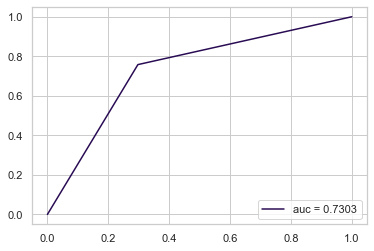

In [181]:
#SMOTE with DTC

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 24)
model3 = dtc.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_pred = model3.predict(x_test)
print("Accuracy after SMOTE on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after SMOTE on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = model3.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show()

- DTC (imbalanced class) model with tuned HYPMs is showing better results
- Model showing overfitting issue with re-sampling techniques and train-test split

#### Trying K-fold Cross Validation with DTC

In [184]:
n_folds = 10


def score(model, data, y_data):
    kf = KFold(n_folds, shuffle = True, random_state = 24).get_n_splits(data.values)
    accuracy = cross_val_score(model, data.values, y_data, scoring = "accuracy", cv = kf)
    RA_score = cross_val_score(model, data.values, y_data, scoring = "roc_auc", cv = kf)
    
    return print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy.mean()*100, RA_score.mean()*100))

In [185]:
benchmodel_score = score(d_tree, train_scaled, y)
benchmodel_score

Accuracy Score: 71.50% 
ROC-AUC Score: 66.97%


In [186]:
tunedmodel_score = score(dtc, train_scaled, y)
tunedmodel_score

Accuracy Score: 76.55% 
ROC-AUC Score: 72.82%


In [187]:
#undersampling model score without tuning
rus_score = score(d_tree, x_rus, y_rus)
rus_score 

Accuracy Score: 61.52% 
ROC-AUC Score: 61.49%


In [189]:
#undersampling model score with tuned HYPMs
tuned_rus_score = score(dtc, x_rus, y_rus)
tuned_rus_score

Accuracy Score: 66.19% 
ROC-AUC Score: 72.10%


In [190]:
#oversampled model score without tuning
ros_score = score(d_tree, x_ros, y_ros)
ros_score 

Accuracy Score: 85.68% 
ROC-AUC Score: 85.68%


In [191]:
#oversampled model score with tuned HYPMs
tuned_ros_score = score(dtc, x_ros, y_ros)
tuned_ros_score 

Accuracy Score: 74.77% 
ROC-AUC Score: 82.47%


In [192]:
#SMOTE model score without tuning
smote_score = score(d_tree, x_sm, y_sm)
smote_score 

Accuracy Score: 75.97% 
ROC-AUC Score: 75.97%


In [193]:
#SMOTE model score with tuned HYPMs
tuned_smote_score = score(dtc, x_sm, y_sm)
tuned_smote_score 

Accuracy Score: 73.83% 
ROC-AUC Score: 81.32%


- Getting good score on R-Oversampler model with 10-folds, without HYPM tuning
- Score decreased after HYPM tuning

### <font color = sky_blue>Random Forest</font> Classifier

In [194]:
rfc = RandomForestClassifier(random_state = 24) #benchmark model instance

tuned_rfc = RandomForestClassifier(criterion = "gini",                 #model instance with tuned HYPMs              
                                   max_depth = 3, max_features = 6,
                                   n_estimators = 2500, random_state = 24)
#min_samples_leaf = 8, min_samples_split = 4, max_leaf_nodes = 2,bootstrap = False

Accuracy on train set: 81.26%
Accuracy on test set: 83.74%


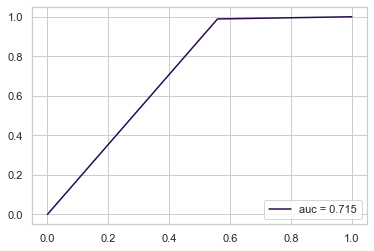

In [196]:
#with imbalanced target class

x_train, x_test, y_train, y_test = train_test_split(train_scaled, y, test_size = 0.2, random_state = 24)
bench_model = tuned_rfc.fit(x_train, y_train)
y_train_pred = bench_model.predict(x_train)
y_pred = bench_model.predict(x_test)
print("Accuracy on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #79.02
print("Accuracy on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #88.62

y_pred_prob = bench_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.7848

Accuracy after RUS on train set: 80.46%
Accuracy after RUS on test set: 63.64%


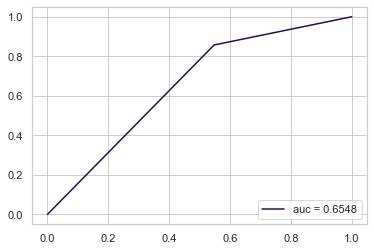

In [197]:
#undersampling with RFC

x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 24)
model1 = tuned_rfc.fit(x_train, y_train)
y_train_pred = model1.predict(x_train)
y_pred = model1.predict(x_test)
print("Accuracy after RUS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after RUS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = model1.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show()

Accuracy after ROS on train set: 75.11%
Accuracy after ROS on test set: 73.37%


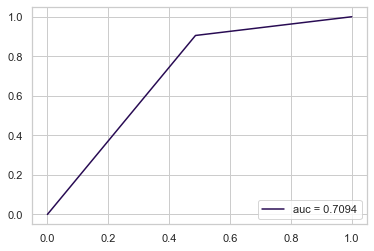

In [198]:
#oversampling with RFC

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 24)
model2 = tuned_rfc.fit(x_train, y_train)
y_train_pred = model2.predict(x_train)
y_pred = model2.predict(x_test)
print("Accuracy after ROS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after ROS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = model2.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show()

Accuracy after SMOTE on train set: 76.59%
Accuracy after SMOTE on test set: 77.51%


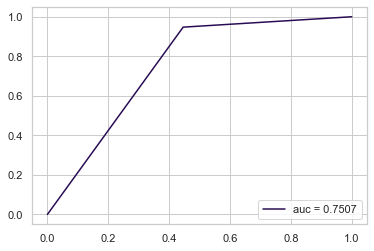

In [199]:
#SMOTE with RFC

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 24)
model3 = tuned_rfc.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_pred = model3.predict(x_test)
print("Accuracy after SMOTE on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after SMOTE on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = model3.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show()

#### Using K-fold cross validation with RFC

In [200]:
n_folds = 10


def score(model, data, y_data):
    kf = KFold(n_folds, shuffle = True, random_state = 24).get_n_splits(data.values)
    accuracy = cross_val_score(model, data.values, y_data, scoring = "accuracy", cv = kf)
    RA_score = cross_val_score(model, data.values, y_data, scoring = "roc_auc", cv = kf)
    
    return print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy.mean()*100, RA_score.mean()*100))

In [201]:
benchmodel_score = score(rfc, train_scaled, y)
benchmodel_score

Accuracy Score: 78.36% 
ROC-AUC Score: 73.81%


In [202]:
tuned_bench_score = score(tuned_rfc, train_scaled, y)
tuned_bench_score

Accuracy Score: 80.80% 
ROC-AUC Score: 76.10%


In [203]:
#undersampled model without HYPM tuning
rusmodel_score = score(rfc, x_rus, y_rus)
rusmodel_score

Accuracy Score: 66.17% 
ROC-AUC Score: 74.65%


In [204]:
#undersampled model with HYPM tuning
tuned_rus_score = score(tuned_rfc, x_rus, y_rus)
tuned_rus_score

Accuracy Score: 72.19% 
ROC-AUC Score: 78.00%


In [205]:
#oversampled model without HYPM tuning
rosmodel_score = score(rfc, x_ros, y_ros)
rosmodel_score

Accuracy Score: 88.99% 
ROC-AUC Score: 95.46%


In [206]:
#oversampled model with HYPM tuning
tuned_ros_score = score(tuned_rfc, x_ros, y_ros)
tuned_ros_score

Accuracy Score: 73.71% 
ROC-AUC Score: 80.66%


In [207]:
#SMOTE model without HYPM tuning
smotemodel_score = score(rfc, x_sm, y_sm)
smotemodel_score

Accuracy Score: 82.86% 
ROC-AUC Score: 89.99%


In [208]:
#SMOTE model with HYPM tuning
tuned_smote_score = score(tuned_rfc, x_sm, y_sm)
tuned_smote_score

Accuracy Score: 74.07% 
ROC-AUC Score: 83.19%


### <font color = sky_blue>KNN</font> Classifier

Accuracy on train set: 80.24%
Accuracy on test set: 71.54%


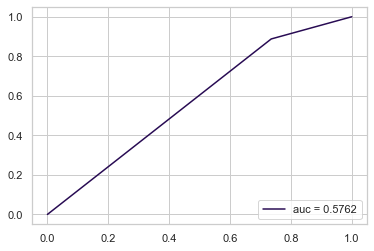

In [210]:
#with imbalanced target class

x_train, x_test, y_train, y_test = train_test_split(train_scaled, y, test_size = 0.2, random_state = 24)

knn = KNeighborsClassifier(algorithm = "auto", #leaf_size = 10, #metric = "minkowski",
                           n_neighbors = 6) #p = 2)

bench_model = knn.fit(x_train, y_train)
y_train_pred = bench_model.predict(x_train)
y_pred = bench_model.predict(x_test)
print("Accuracy on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #77.19
print("Accuracy on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #79.67

y_pred_prob = bench_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.6692

Accuracy after RUS on train set: 76.87%
Accuracy after RUS on test set: 58.44%


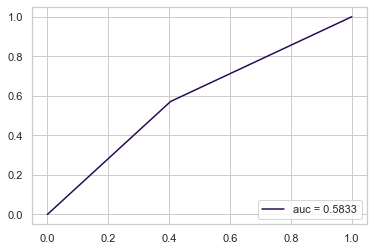

In [211]:
#undersampling with KNN

x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 24)
model1 = knn.fit(x_train, y_train)
y_train_pred = model1.predict(x_train)
y_pred = model1.predict(x_test)
print("Accuracy after RUS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2)))
print("Accuracy after RUS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2)))

y_pred_prob = model1.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show()

Accuracy after ROS on train set: 78.07%
Accuracy after ROS on test set: 68.05%


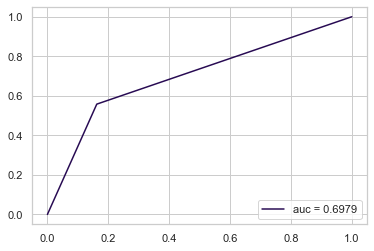

In [212]:
#oversampling with KNN

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 24)
model2 = knn.fit(x_train, y_train)
y_train_pred = model2.predict(x_train)
y_pred = model2.predict(x_test)
print("Accuracy after ROS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #81.48
print("Accuracy after ROS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #66.86

y_pred_prob = model2.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.6694

Accuracy after SMOTE on train set: 82.52%
Accuracy after SMOTE on test set: 76.92%


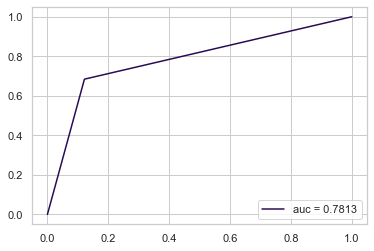

In [213]:
#SMOTE with KNN

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 24)
model3 = knn.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_pred = model3.predict(x_test)
print("Accuracy after SMOTE on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #83.26
print("Accuracy after SMOTE on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #77.52

y_pred_prob = model3.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.7806

#### Using K-fold Cross Validation with KNN

In [214]:
n_folds = 10


def score(model, data, y_data):
    kf = KFold(n_folds, shuffle = True, random_state = 24).get_n_splits(data.values)
    accuracy = cross_val_score(model, data.values, y_data, scoring = "accuracy", cv = kf)
    RA_score = cross_val_score(model, data.values, y_data, scoring = "roc_auc", cv = kf)
    
    return print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy.mean()*100, RA_score.mean()*100))

In [215]:
benchmodel_score = score(knn, train_scaled, y)
benchmodel_score

Accuracy Score: 71.66% 
ROC-AUC Score: 65.21%


In [217]:
#undersampling model score
rusmodel_score = score(knn, x_rus, y_rus)
rusmodel_score

Accuracy Score: 61.77% 
ROC-AUC Score: 66.09%


In [218]:
#oversampling model score
rosmodel_score = score(knn, x_ros, y_ros)
rosmodel_score

Accuracy Score: 68.85% 
ROC-AUC Score: 77.61%


In [219]:
#SMOTE model score
smotemodel_score = score(knn, x_sm, y_sm)
smotemodel_score

Accuracy Score: 75.01% 
ROC-AUC Score: 82.81%


### <font color = sky_blue>Support Vector</font> Classifier

Accuracy on train set: 84.11%
Accuracy on test set: 82.11%


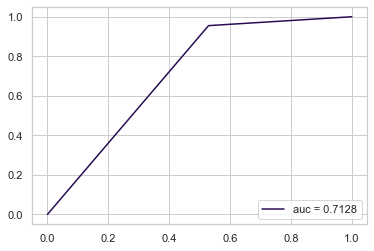

In [225]:
#with imbalanced target class

x_train, x_test, y_train, y_test = train_test_split(train_scaled, y, test_size = 0.2, shuffle = True, random_state = 24)
svc = SVC(C = 2.5, kernel = "poly", probability = True)
bench_model = svc.fit(x_train, y_train)
y_train_pred = bench_model.predict(x_train)
y_pred = bench_model.predict(x_test)
print("Accuracy on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #79.43
print("Accuracy on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #88.62

y_pred_prob = bench_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.7879

Accuracy after RUS on train set: 81.43%
Accuracy after RUS on test set: 63.64%


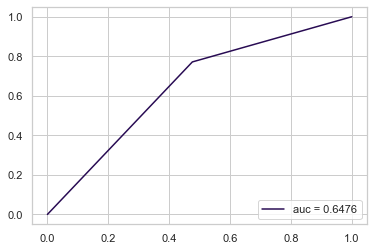

In [226]:
#undersampling with SVC

x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 24)
model1 = svc.fit(x_train, y_train)
y_train_pred = model1.predict(x_train)
y_pred = model1.predict(x_test)
print("Accuracy after RUS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #77.52
print("Accuracy after RUS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #62.34

y_pred_prob = model1.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.6452

Accuracy after ROS on train set: 78.96%
Accuracy after ROS on test set: 82.25%


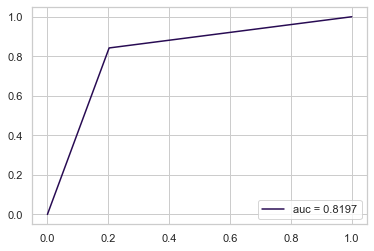

In [227]:
#oversampling with SVC

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 24)
model2 = svc.fit(x_train, y_train)
y_train_pred = model2.predict(x_train)
y_pred = model2.predict(x_test)
print("Accuracy after ROS on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #78.52
print("Accuracy after ROS on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #68.64

y_pred_prob = model2.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.6828

Accuracy after SMOTE on train set: 82.67%
Accuracy after SMOTE on test set: 80.47%


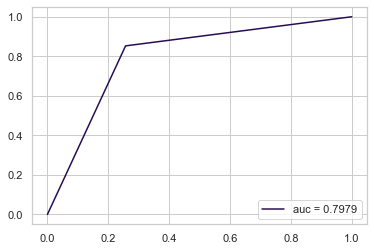

In [228]:
#SMOTE with SVC

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 24)
model3 = svc.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_pred = model3.predict(x_test)
print("Accuracy after SMOTE on train set: {}%".format(np.round(accuracy_score(y_train_pred, y_train)*100,2))) #78.37
print("Accuracy after SMOTE on test set: {}%".format(np.round(accuracy_score(y_pred, y_test)*100,2))) #81.66

y_pred_prob = model3.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr, label = "auc = {:.4}".format(auc))
plt.legend(loc = 4)
plt.show() #0.7995

#### Using K-fold Cross Validation with SVC

In [229]:
n_folds = 10


def score(model, data, y_data):
    kf = KFold(n_folds, shuffle = True, random_state = 24).get_n_splits(data.values)
    accuracy = cross_val_score(model, data.values, y_data, scoring = "accuracy", cv = kf)
    RA_score = cross_val_score(model, data.values, y_data, scoring = "roc_auc", cv = kf)
    
    return print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy.mean()*100, RA_score.mean()*100))

In [230]:
benchmodel_score = score(svc, train_scaled, y)
benchmodel_score

Accuracy Score: 79.66% 
ROC-AUC Score: 73.98%


In [231]:
#undersampling model score
rusmodel_score = score(svc, x_rus, y_rus)
rusmodel_score #69.07, 74.01

Accuracy Score: 69.61% 
ROC-AUC Score: 74.27%


In [232]:
#oversampling model score
rosmodel_score = score(svc, x_ros, y_ros)
rosmodel_score #73.11, 79.67

Accuracy Score: 76.32% 
ROC-AUC Score: 80.99%


In [233]:
#SMOTE model score
smotemodel_score = score(svc, x_sm, y_sm)
smotemodel_score #75.49, 82.65

Accuracy Score: 78.11% 
ROC-AUC Score: 83.18%


### <font color = sky_blue>Grid Search CV</font>

In [121]:
# Logistic Regression 
print("****Logistic Regression")
logreg_params = {"penalty": ["l1", "l2"], 
                 "C": [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 0.5, 0.05, 0.005, 0.0005],
                 "l1_ratio": [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.0005, 0.005, 0.05, 0.5, 0.8, 0.9]}
grid_logreg = GridSearchCV(LogisticRegression(), logreg_params)
grid_logreg.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_logreg.best_estimator_, grid_logreg.best_score_))

****Logistic Regression

Best estimator: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1e-05, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
Best score: 0.8025



In [122]:
# #KNN
# print("\n****KNN classifier")
# knn_params = {"n_neighbors": list(range(2,5,1)), 
#               "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

# grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
# grid_knn.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_knn.best_estimator_, grid_knn.best_score_))

#KNN
print("\n****KNN classifier****")
knn_params = {"leaf_size": list(range(1, 12, 1))}

grid_knn = GridSearchCV(KNeighborsClassifier(n_neighbors = 6, algorithm = "auto",
                                            weights = "distance", p = 1, metric = "minkowski"), knn_params)
grid_knn.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_knn.best_estimator_, grid_knn.best_score_))


****KNN classifier****

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='distance') 
Best score: 0.7867



In [164]:
# Support Vector Classifier
#print("\n****SVC****")
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_svc.best_estimator_, grid_svc.best_score_))

print("\n****SVC****")
svc_params = {"C": [0.5, 0.7, 0.9, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5], 
              "kernel": ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_svc.best_estimator_, grid_svc.best_score_))


****SVC****

Best estimator: SVC(C=2.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
Best score: 0.7822



In [206]:
#Decision Tree Classifier
# print("\n****Decision Tree Classifier****")
# dtc_params = {"criterion": ["gini", "entropy"], 
#                "max_depth": list(range(2,8,1)), 
#                "min_samples_leaf": list(range(5,10,1))}
# grid_dtc = GridSearchCV(DecisionTreeClassifier(), dtc_params, n_jobs = -1)
# grid_dtc.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_dtc.best_estimator_, grid_dtc.best_score_))


print("\n****Decision Tree Classifier****")
dtc_params = {"max_depth": list(range(2,10,1)),
              "min_samples_leaf": list(range(5,10,1)),
              "min_samples_split": list(range(2,12,1)),
              "max_features": list(range(2, 10, 1))}
grid_dtc = GridSearchCV(DecisionTreeClassifier(criterion = "gini"), dtc_params)
                                              
grid_dtc.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_dtc.best_estimator_, grid_dtc.best_score_))


****Decision Tree Classifier****

Best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
Best score: 0.757



In [ ]:
# rfc_params = {"n_estimators": list(range(500, 4000, 500)),
#               "criterion": ["gini", "entropy"],
#               "max_depth": list(range(4, 32, 4)),
#               "min_samples_split": list(range(2, 20, 2)),
#               "min_samples_leaf": list(range(1, 10, 1)),
#               "max_features": ["sqrt"],
#               "bootstrap": [True]}
# grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params, n_jobs = -1)
# grid_rfc.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_rfc.best_estimator_, grid_rfc.best_score_))

In [247]:
# print("\n****Random Forest Classifier****")
# rfc_params = {"n_estimators": list(range(500, 4000, 500)),
#               "criterion": ["gini", "entropy"],
#               "max_features": ["sqrt"],
#               "bootstrap": [True]}
# grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params, n_jobs = -1)
# grid_rfc.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_rfc.best_estimator_, grid_rfc.best_score_))

In [248]:
#Random forest clasifier 
rfc_params = {"max_depth": list(range(1, 10, 1))}
grid_rfc = GridSearchCV(RandomForestClassifier(n_estimators = 2500, criterion = "entropy",
                                               max_features = "sqrt", bootstrap = True,
                                               max_depth = 3), rfc_params, n_jobs = -1)
grid_rfc.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_rfc.best_estimator_, grid_rfc.best_score_))


Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
Best score: 0.7881



In [285]:
rfc_params = {"max_leaf_nodes": list(range(2, 10, 1))} #list(range(1, 15, 1)) - 10
grid_rfc = GridSearchCV(RandomForestClassifier(n_estimators = 3000, criterion = "entropy",
                                               bootstrap = True, max_depth = 3,
                                               min_samples_split = 4, min_samples_leaf = 8, 
                                               max_features = 10), rfc_params, n_jobs = -1)
grid_rfc.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_rfc.best_estimator_, grid_rfc.best_score_)) #0.7922


Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features=10,
                       max_leaf_nodes=2, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
Best score: 0.7901



In [99]:
rfc_params = {"max_depth": [2, 3, 4, 5]}
grid_rfc = GridSearchCV(RandomForestClassifier(n_estimators = 2500, criterion = "entropy",
                                               min_samples_leaf = 7, min_samples_split = 10,
                                               max_features = "sqrt", bootstrap = True
                                               ), rfc_params, n_jobs = -1)
grid_rfc.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}\n".format(grid_rfc.best_estimator_, grid_rfc.best_score_))


Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
Best score: 0.6762



### Models giving the best score:
- smote_model_score (LogReg)
- ros_score (DTC)
- rosmodel_score (RFC)
- smotemodel_score (SVC)
- smotemodel_score (KNN)

## Predicting on the **test dataset**

### <font color = gold>LogReg</font>

In [329]:
logreg.fit(train_scaled, y)
logreg_train_pred = logreg.predict(train_scaled)
logreg_pred = logreg.predict(test)
print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y, logreg_train_pred)*100, 
                                                                roc_auc_score(y, logreg_train_pred)*100))

Accuracy Score: 80.94% 
ROC-AUC Score: 70.52%


In [263]:
# logreg.fit(x_sm, y_sm)
# logreg_train_pred = logreg.predict(x_sm)
# logreg_pred = logreg.predict(test)
# print("Accuracy Score: {}% \nROC-AUC Score: {}%".format(accuracy_score(y_sm, logreg_train_pred)*100, 
#                                                                 roc_auc_score(y_sm, logreg_train_pred)*100))

### <font color = gold>DTC</font>

In [321]:
dtc.fit(train_scaled, y)
dtree_train_pred = dtc.predict(train_scaled)
dtree_pred = dtc.predict(test)
print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y, dtree_train_pred)*100, 
                                                                roc_auc_score(y, dtree_train_pred)*100))

Accuracy Score: 82.90% 
ROC-AUC Score: 79.04%


In [262]:
# dtc.fit(x_ros, y_ros)
# Dtree_train_pred = dtc.predict(x_ros)
# Dtree_pred = dtc.predict(test)
# print("Accuracy Score: {}% \nROC-AUC Score: {}%".format(accuracy_score(y_ros, Dtree_train_pred)*100, 
#                                                                 roc_auc_score(y_ros, Dtree_train_pred)*100))

### <font color = gold>RFC</font>

In [388]:
tuned_rfc.fit(train_scaled, y)
trfc_train_pred = tuned_rfc.predict(train_scaled)
trfc_pred = tuned_rfc.predict(test)
print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y, trfc_train_pred)*100, 
                                                                roc_auc_score(y, trfc_train_pred)*100))

Accuracy Score: 81.60% 
ROC-AUC Score: 71.71%


In [245]:
# tuned_rfc.fit(x_ros, y_ros)
# trfc_train_pred = tuned_rfc.predict(x_ros)
# trfc_pred = tuned_rfc.predict(test)
# print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y_ros, trfc_train_pred)*100, 
#                                                                 roc_auc_score(y_ros, trfc_train_pred)*100))

### <font color = gold>SVC</font>

In [251]:
svc.fit(train_scaled, y)
svc_train_pred = svc.predict(train_scaled)
svc_pred = svc.predict(test)
print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y, svc_train_pred)*100, 
                                                                roc_auc_score(y, svc_train_pred)*100))

Accuracy Score: 83.71% 
ROC-AUC Score: 74.81%


In [260]:
# svc.fit(x_sm, y_sm)
# SVC_train_pred = svc.predict(x_sm)
# SVC_pred = svc.predict(test)
# print("Accuracy Score: {}% \nROC-AUC Score: {}%".format(accuracy_score(y_sm, SVC_train_pred)*100, 
#                                                                 roc_auc_score(y_sm, SVC_train_pred)*100))

### <font color = gold>KNN</font>

In [331]:
knn.fit(train_scaled, y)
knn_train_pred = knn.predict(train_scaled)
knn_pred = knn.predict(test)
print("Accuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y, knn_train_pred)*100, 
                                                                roc_auc_score(y, knn_train_pred)*100))

Accuracy Score: 79.80% 
ROC-AUC Score: 72.82%


In [261]:
# knn.fit(x_sm, y_sm)
# KNN_train_pred = knn.predict(x_sm)
# KNN_pred = knn.predict(test)
# print("Accuracy Score: {}% \nROC-AUC Score: {}%".format(accuracy_score(y_sm, KNN_train_pred)*100, 
#                                                                 roc_auc_score(y_sm, KNN_train_pred)*100))

### Rank <font color = red>Ensembling</font>

In [257]:
#train set
from statistics import mode
train_preds = np.array([])
temp_preds = np.array([])

for i in range(0, len(train_scaled)):
    train_preds = np.append(train_preds, mode([dtree_train_pred[i], knn_train_pred[i], svc_train_pred[i]]))
    #temp_preds = np.append(temp_preds, mode([Dtree_train_pred[i], KNN_train_pred[i], SVC_train_pred[i]]))
   
 #logreg_train_pred[i], trfc_train_pred[i]

In [403]:
print("*Score on train data*\nAccuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y, train_preds)*100, 
                                                                roc_auc_score(y, train_preds)*100))

*Score on train data*
Accuracy Score: 84.53% 
ROC-AUC Score: 76.68%


In [265]:
# print("*Score on temp data*\nAccuracy Score: {:.2f}% \nROC-AUC Score: {:.2f}%".format(accuracy_score(y, temp_preds)*100, 
#                                                                 roc_auc_score(y, temp_preds)*100))

In [404]:
#finally, predicting on test set using the ensemble
final_preds = np.array([])

for i in range(0, len(test)):
    final_preds = np.append(final_preds, mode([dtree_pred[i], svc_pred[i], knn_pred[i]]))

# Final test set

In [407]:
test["loan_status"] = final_preds

In [409]:
test.to_csv("Final_test.csv", index = False)